We load the libraries to be used in the experimentation

In [2]:
import numpy as np
import pandas as pd

from scipy.stats import f_oneway, ttest_ind, shapiro
import scipy.stats as ss
import scikit_posthocs as sp

Continue loading the data of the populations to be tested:

In [3]:
data_arch2 = [
    ['max', 0.8658, 0.8682, 0.8606, 0.8632, 0.8578],
    ['avg', 0.8584, 0.8661, 0.8602, 0.8633, 0.8643],
    ['g_prod', 0.8750, 0.8714, 0.8735, 0.8738, 0.8711, 0.8753, 0.8744, 0.8727, 0.8798, 0.8789],
    ['g_ob', 0.8735, 0.8798, 0.8739, 0.8736, 0.8697, 0.872, 0.8813, 0.8758, 0.8719, 0.8762],
    ['gp_prod_p_0_1', 0.8773, 0.8798, 0.8802, 0.8814, 0.8819],
    ['gp_prod_p_0_25', 0.8796, 0.8838, 0.8825, 0.882, 0.8784, 0.8819, 0.8821, 0.8796, 0.8828, 0.8763],
    ['gp_prod_p_0_5', 0.8723, 0.8794, 0.8783, 0.8829, 0.8755],
    ['gp_comb_maxAndOB', 0.873, 0.8719, 0.8682, 0.8691, 0.8698, 0.8697, 0.8697, 0.8742, 0.8682, 0.8768],
    ['gp_comb_maxAndProd', 0.8821, 0.8716, 0.8789, 0.8779, 0.8716, 0.8781, 0.8688, 0.8732, 0.873, 0.8717],
    ['gp_comb_maxProdAndOB', 0.8713, 0.8762, 0.8766, 0.8744, 0.8713, 0.8714, 0.8734, 0.8739, 0.8755, 0.876],
    ['gp_comb_prodAndOB', 0.8746, 0.8799, 0.8766, 0.8766, 0.8797, 0.873, 0.8685, 0.8741, 0.873, 0.8715],
    ['gp_comp_max_prodAndOB', 0.88, 0.8735, 0.872, 0.8729, 0.8782, 0.8735, 0.8784, 0.8783, 0.8798, 0.8772],
    ['gp_comp_ob_maxandProd', 0.8732, 0.877, 0.8754, 0.8728, 0.8741, 0.8782, 0.8693, 0.8761, 0.8735, 0.8773],
    ['gp_comp_prod_maxAndOB', 0.8733, 0.8785, 0.8762, 0.8698, 0.8754, 0.8717, 0.8747, 0.8675, 0.8652, 0.8767],
    ['gp_comp_prod_maxAndProd', 0.8747, 0.8779, 0.8774, 0.875, 0.8728, 0.8753, 0.8762, 0.8759, 0.8788, 0.8764],
    ['gp_comp_prod_prodAndOB', 0.8741, 0.874, 0.879, 0.8756, 0.8749, 0.8695, 0.8763, 0.876, 0.8802, 0.8756]
]

data_values = [values[1:] for values in data_arch2]
df = pd.DataFrame(data=data_arch2, columns=['Model', 'Test1', 'Test2', 'Test3', 'Test4', 'Test5'])
df = df.set_index('Model')

ValueError: 6 columns passed, passed data had 11 columns

We start by testing for normality in each population:

In [33]:
for pop in data_arch2:
    test_result = ss.shapiro(pop[1:])
    print('Shapiro test result for grouping {}: {}'.format(pop[0], test_result))
    if (test_result[1] > 0.05):
        print('We cannot discard that the previous population was sampled from a normal distribution')

Shapiro test result for grouping max: ShapiroResult(statistic=0.9860615730285645, pvalue=0.9641755223274231)
We cannot discard that the previous population was sampled from a normal distribution
Shapiro test result for grouping avg: ShapiroResult(statistic=0.9580554366111755, pvalue=0.7943816781044006)
We cannot discard that the previous population was sampled from a normal distribution
Shapiro test result for grouping g_prod: ShapiroResult(statistic=0.9100196361541748, pvalue=0.4677083194255829)
We cannot discard that the previous population was sampled from a normal distribution
Shapiro test result for grouping g_ob: ShapiroResult(statistic=0.8831984996795654, pvalue=0.32405728101730347)
We cannot discard that the previous population was sampled from a normal distribution
Shapiro test result for grouping gp_prod_p_0_1: ShapiroResult(statistic=0.9215002059936523, pvalue=0.539663553237915)
We cannot discard that the previous population was sampled from a normal distribution
Shapiro tes

All populations seem to be normal, so we apply statistical tests that allow for normality. We now will perform ANOVA testing in all populations to check if there are statistical differences among them:

<font color='red'>Warning</font>: Populations are very small (n = 5, n < 20), so populations may not really be normal. Further experimenting could be necessary.

In [34]:
test_result = ss.f_oneway(*data_values, axis=0)
print(test_result)

F_onewayResult(statistic=15.118081078231254, pvalue=1.280219145791561e-15)


The p-value obtained is well beyond the imposed threshold of 0.05, so we can safely discard the null hypothesis that all populations are equal (and thus, there must be some model whose accuracies are statistically better or worse than those of the rest). 

We now need to find out which models are statistically different via post-hoc tests between each pair of tests.

In [30]:
data_values_np = np.array(data_values)
sp.posthoc_anderson(data_values_np)

/home/iosu.rodriguez/anaconda3/envs/pytorch/lib/python3.8/site-packages/scikit_posthocs/_posthocs.py:1269: UserWarning: p-value capped: true value larger than 0.25
  vs[i, j] = ss.anderson_ksamp([x.loc[x[_group_col] == groups[i], _val_col], x.loc[x[_group_col] == groups[j], _val_col]], midrank=midrank)[2]
/home/iosu.rodriguez/anaconda3/envs/pytorch/lib/python3.8/site-packages/scikit_posthocs/_posthocs.py:1269: UserWarning: p-value capped: true value larger than 0.25
  vs[i, j] = ss.anderson_ksamp([x.loc[x[_group_col] == groups[i], _val_col], x.loc[x[_group_col] == groups[j], _val_col]], midrank=midrank)[2]
/home/iosu.rodriguez/anaconda3/envs/pytorch/lib/python3.8/site-packages/scikit_posthocs/_posthocs.py:1269: UserWarning: p-value capped: true value larger than 0.25
  vs[i, j] = ss.anderson_ksamp([x.loc[x[_group_col] == groups[i], _val_col], x.loc[x[_group_col] == groups[j], _val_col]], midrank=midrank)[2]
/home/iosu.rodriguez/anaconda3/envs/pytorch/lib/python3.8/site-packages/scikit_

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,1.000000,0.250000,0.004356,0.004356,0.004356,0.004356,0.004356,0.005658,0.003572,0.003572,0.003715,0.004356,0.004356,0.004356,0.004356,0.004356
2,0.250000,1.000000,0.004356,0.004356,0.004356,0.004356,0.004356,0.004356,0.003572,0.003572,0.003715,0.004356,0.004356,0.004356,0.004356,0.004356
3,0.004356,0.004356,1.000000,0.250000,0.004356,0.004356,0.037320,0.070584,0.173200,0.250000,0.008781,0.250000,0.250000,0.250000,0.102649,0.037320
4,0.004356,0.004356,0.250000,1.000000,0.013420,0.021065,0.250000,0.037320,0.250000,0.250000,0.054596,0.250000,0.250000,0.250000,0.250000,0.056741
5,0.004356,0.004356,0.004356,0.013420,1.000000,0.250000,0.225078,0.004356,0.177706,0.003571,0.037278,0.043801,0.004356,0.010368,0.021065,0.010368
6,0.004356,0.004356,0.004356,0.021065,0.250000,1.000000,0.121731,0.004356,0.062981,0.003571,0.059879,0.021065,0.004356,0.010368,0.004356,0.010368
7,0.004356,0.004356,0.037320,0.250000,0.225078,0.121731,1.000000,0.010368,0.250000,0.102219,0.250000,0.250000,0.121731,0.250000,0.200097,0.250000
8,0.005658,0.004356,0.070584,0.037320,0.004356,0.004356,0.010368,1.000000,0.069525,0.069525,0.003715,0.021065,0.010368,0.026977,0.010368,0.004356
9,0.003572,0.003572,0.173200,0.250000,0.177706,0.062981,0.250000,0.069525,1.000000,0.137062,0.250000,0.250000,0.132286,0.250000,0.172738,0.250000
10,0.003572,0.003572,0.250000,0.250000,0.003571,0.003571,0.102219,0.069525,0.137062,1.000000,0.025232,0.250000,0.250000,0.250000,0.245070,0.250000


     1    2    3    4    5    6    7    8    9    10   11   12   13   14   15  \
1  -1.0  0.0  3.0  2.0  1.0  1.0  1.0  0.0  1.0  2.0  1.0  1.0  1.0  1.0  1.0   
2   0.0 -1.0  3.0  2.0  1.0  1.0  1.0  0.0  1.0  2.0  1.0  1.0  1.0  1.0  1.0   
3   3.0  3.0 -1.0  0.0  1.0  1.0  2.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0   
4   2.0  2.0  0.0 -1.0  2.0  1.0  0.0  3.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0   
5   1.0  1.0  1.0  2.0 -1.0  0.0  0.0  1.0  3.0  1.0  0.0  2.0  2.0  2.0  3.0   
6   1.0  1.0  1.0  1.0  0.0 -1.0  0.0  1.0  3.0  1.0  0.0  2.0  1.0  2.0  2.0   
7   1.0  1.0  2.0  0.0  0.0  0.0 -1.0  1.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0   
8   0.0  0.0  0.0  3.0  1.0  1.0  1.0 -1.0  2.0  0.0  1.0  2.0  3.0  3.0  2.0   
9   1.0  1.0  0.0  0.0  3.0  3.0  0.0  2.0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0   
10  2.0  2.0  0.0  0.0  1.0  1.0  3.0  0.0  0.0 -1.0  3.0  0.0  0.0  0.0  0.0   
11  1.0  1.0  2.0  3.0  0.0  0.0  0.0  1.0  0.0  3.0 -1.0  0.0  0.0  0.0  0.0   
12  1.0  1.0  0.0  0.0  2.0 

(<AxesSubplot:>, <matplotlib.colorbar.ColorbarBase at 0x7f97d0913610>)

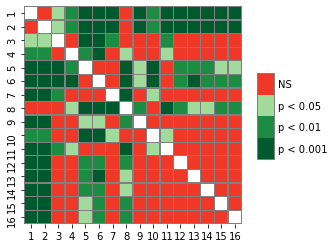

In [41]:
pc = sp.posthoc_conover(data_values_np)
cmap = ['#FFFFFF', "#F03828", '#005A2E', '#1D8C43', '#A2DA9C']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
# heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)